# Question 1

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
df=pd.read_csv("5_a.csv")

In [5]:
df.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [6]:
df[df.y==1.0].count()

y        10000
proba    10000
dtype: int64

In [7]:
df[df.proba>0.5].count()

y        10100
proba    10100
dtype: int64

In [8]:
label=list(df.y)

In [9]:
predicted_label=list(df.proba)

In [10]:
for i in range(len(predicted_label)):
    if predicted_label[i]<0.5:
        predicted_label[i]=0;
    else:
        predicted_label[i]=1

In [11]:
true_positive,true_negative,false_positive,false_negative=0,0,0,0

In [12]:
for i in range(len(label)):
    if(label[i]==0 and predicted_label[i]==0):
        true_negative+=1
    elif(label[i]==0 and predicted_label[i]==1):
        false_positive+=1
    elif(label[i]==1 and predicted_label[i]==0):
        false_negative+=1
    else:
        true_positive+=1

In [13]:
print("True Positive: "+str(true_positive))
print("True Negative: "+str(true_negative))
print("False Positive: "+str(false_positive))
print("False Negative: "+str(false_negative))

True Positive: 10000
True Negative: 0
False Positive: 100
False Negative: 0


In [14]:
precision=true_positive/(true_positive+false_positive)
recall=true_positive/(true_positive+false_negative)

In [15]:
print("Precision: "+str(precision))
print("Recall: "+str(recall))

Precision: 0.9900990099009901
Recall: 1.0


In [16]:
F1_score=2*precision*recall/(precision+recall)
print("F1 Score: "+str(F1_score))

F1 Score: 0.9950248756218906


In [17]:
count=0
for i in range(len(label)):
    if(label[i]==predicted_label[i]):
        count=count+1

In [18]:
print("Accuracy Score: "+str(count/len(label)))

Accuracy Score: 0.9900990099009901


In [19]:
proba=df['proba']


In [20]:
label=df['y']


In [21]:
new=[[0 for i in range(2)]for i in range(len(label))]

In [22]:
for i in range(len(label)):
    new[i][0]=proba[i]
    new[i][1]=label[i]

In [23]:
for i in range(len(label)):
    for j in range(0, len(label)-i-1):  
            if (new[j][0] > new[j + 1][0]):  
                temp = new[j]  
                new[j]= new[j + 1]  
                new[j + 1]= temp  

In [24]:
for i in range(len(label)):
    proba[i]=new[i][0]
    label[i]=new[i][1]

In [25]:
proba=np.array(proba)
label=np.array(label)

In [26]:
tpr=list()
fpr=list()

In [27]:
from tqdm import tqdm

In [33]:
for i in tqdm(proba):
    tou=i
    new_label=np.array(df.proba)
    for j in range(len(new_label)):
        if(new_label[j]<tou):
            new_label[j]=0
        else:
            new_label[j]=1
    true_positive,true_negative,false_positive,false_negative=0,0,0,0
    for k in range(len(new_label)):
        if(label[k]==1 and new_label[k]==1):
            true_positive+=1
        elif(label[k]==1 and new_label[k]==0):
            false_negative+=1
        elif(label[k]==0 and new_label[k]==1):
            false_positive+=1
        else:
            true_negative+=1
    tpr.append(true_positive/(true_positive+false_negative))
    fpr.append(false_positive/(false_positive+true_negative))

100%|████████████████████████████████████████████████████████████████████████████| 10100/10100 [03:07<00:00, 53.79it/s]


In [29]:
import matplotlib.pyplot as plt

In [30]:
x=[i for i in range(-1,1001)]
y=[i for i in range(-1,1001)]
for i in range(len(x)):
    x[i]=x[i]/1000
    y[i]=y[i]/1000

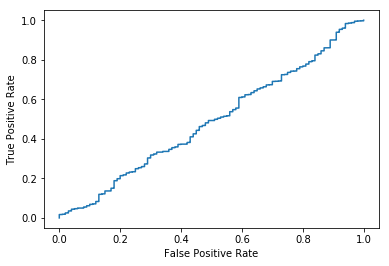

In [31]:
plt.plot(sorted(fpr),sorted(tpr))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [32]:
np.trapz(sorted(tpr),sorted(fpr))

0.48829900000000004

# Question 2

In [100]:
df=pd.read_csv("5_b.csv")

In [101]:
df.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [102]:
label=df.y

In [104]:
predicted_label=list(df.proba)
print(predicted_label)

[0.28103452586590194, 0.4651517681088171, 0.3527929830180201, 0.1578180153970636, 0.2766476717350224, 0.19026003795357926, 0.3203283077054345, 0.4350131376634192, 0.2848489585673971, 0.42791898839439707, 0.2471653971912076, 0.21599843861610368, 0.2341036361489145, 0.3556147385586961, 0.41496881496897664, 0.37938032636601937, 0.4990048208421642, 0.13632303964363973, 0.4538547523018753, 0.1958339967198177, 0.4018914357024521, 0.378929471152997, 0.2718826167489721, 0.42098448288150414, 0.3913459918766132, 0.4578887401078434, 0.1841417316192832, 0.4644198619861372, 0.2103598809704244, 0.10868582074467473, 0.4830843536915973, 0.13992502738641766, 0.328347811370332, 0.3013975278075999, 0.17836953776758108, 0.38917648507052616, 0.11334174775830545, 0.3005751711935898, 0.1002421268327976, 0.18598317484957516, 0.3383107005895733, 0.4741711781623852, 0.545932326276939, 0.4677593890088872, 0.12392337197531247, 0.4025284381867067, 0.347692873824321, 0.17396133801995642, 0.3450195819296357, 0.23144

In [105]:
for i in range(len(predicted_label)):
    if(predicted_label[i]<0.5):
        predicted_label[i]=0
    else:
        predicted_label[i]=1

In [108]:
true_positive,false_positive,true_negative,false_negative=0,0,0,0

In [109]:
for i in range(len(label)):
    if(label[i]==0 and predicted_label[i]==0):
        true_negative+=1
    elif(label[i]==0 and predicted_label[i]==1):
        false_positive+=1
    elif(label[i]==1 and predicted_label[i]==0):
        false_negative+=1
    else:
        true_positive+=1

In [110]:
print("True Positive: "+str(true_positive))
print("True Negative: "+str(true_negative))
print("False Positive: "+str(false_positive))
print("False Negative: "+str(false_negative))

True Positive: 55
True Negative: 9761
False Positive: 239
False Negative: 45


In [111]:
precision=true_positive/(true_positive+false_positive)
recall=true_positive/(true_positive+false_negative)

In [112]:
print("Precision: "+str(precision))
print("Recall: "+str(recall))

Precision: 0.1870748299319728
Recall: 0.55


In [113]:
F1_score=2*precision*recall/(precision+recall)
print("F1 Score: "+str(F1_score))

F1 Score: 0.2791878172588833


In [147]:
count=0
for i in range(len(predicted_label)):
    if(predicted_label[i]==label[i]):
        count=count+1
        

In [148]:
print("Accuracy Score: "+str(count/len(predicted_label)))

Accuracy Score: 0.9613861386138614


In [114]:
proba=df['proba']
label=df['y']

In [117]:

new=[[0 for i in range(2)]for i in range(len(label))]

In [118]:
for i in range(len(label)):
    new[i][0]=proba[i]
    new[i][1]=label[i]

In [119]:
for i in range(len(label)):
    for j in range(0, len(label)-i-1):  
            if (new[j][0] > new[j + 1][0]):  
                temp = new[j]  
                new[j]= new[j + 1]  
                new[j + 1]= temp  

In [121]:
for i in range(len(label)):
    proba[i]=new[i][0]
    label[i]=new[i][1]

In [124]:
tpr=list()
fpr=list()

In [36]:
tqdm=np.array(tqdm)


In [43]:
from tqdm import tqdm

In [44]:
for i in tqdm(proba):
    tou=i
    new_label=np.array(df.proba)
    for j in range(len(new_label)):
        if(new_label[j]<tou):
            new_label[j]=0
        else:
            new_label[j]=1
    true_positive,true_negative,false_positive,false_negative=0,0,0,0
    for k in range(len(new_label)):
        if(label[k]==1 and new_label[k]==1):
            true_positive+=1
        elif(label[k]==1 and new_label[k]==0):
            false_negative+=1
        elif(label[k]==0 and new_label[k]==1):
            false_positive+=1
        else:
            true_negative+=1
    tpr.append(true_positive/(true_positive+false_negative))
    fpr.append(false_positive/(false_positive+true_negative))

100%|████████████████████████████████████████████████████████████████████████████| 10100/10100 [02:58<00:00, 56.57it/s]


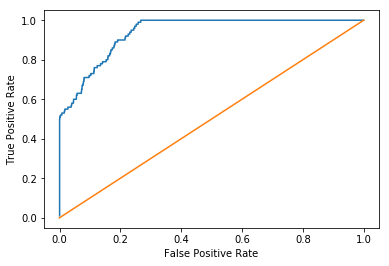

In [138]:
plt.plot(sorted(fpr),sorted(tpr))
plt.plot(x,y)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [146]:
np.trapz(sorted(tpr),sorted(fpr))

0.9377570000000001

# 3rd Question

In [190]:
import pandas as pd
import numpy as np

In [191]:
df=pd.read_csv("5_c.csv")

In [192]:
print(df.head())

   y      prob
0  0  0.458521
1  0  0.505037
2  0  0.418652
3  0  0.412057
4  0  0.375579


In [193]:
label=list(df.y)
predicted_label=list(df.prob)


In [194]:

new=[[0 for i in range(2)]for i in range(len(label))]

In [195]:
for i in range(len(label)):
    new[i][1]=label[i]
    new[i][0]=predicted_label[i]

In [197]:
for i in range(len(label)):
    for j in range(0, len(label)-i-1):  
            if (new[j][0] > new[j + 1][0]):  
                temp = new[j]  
                new[j]= new[j + 1]  
                new[j + 1]= temp  

In [213]:
for i in range(len(label)):
    proba[i]=new[i][0]
    label[i]=new[i][1]

In [215]:
predicted_label=proba.copy()

In [217]:
sum1=list()

In [218]:
from tqdm import tqdm

In [220]:
for i in tqdm(predicted_label):
    proba=list(predicted_label)
    for j in range(len(label)):
        if(proba[j]<i):
            proba[j]=0
        else:
            proba[j]=1
    true_positive,false_negative,true_negative,false_positive=0,0,0,0
    for k in range(len(label)):
        if(label[k]==0 and proba[k]==0):
            true_negative+=1
        elif(label[k]==0 and proba[k]==1):
            false_positive+=1
        elif(label[k]==1 and proba[k]==0):
            false_negative+=1
        else:
            true_positive+=1
    sum1.append(500*false_negative+100*false_positive)
            
            

100%|█████████████████████████████████████████████████████████████████████████████| 2852/2852 [00:09<00:00, 308.25it/s]


In [221]:
index=sum1.index(min(sum1))

In [222]:
print("Best Thresold Value: "+str(new[index][0]))

Best Thresold Value: 0.2300390278970873


# Question no:4

In [4]:
df=pd.read_csv("5_d.csv")

In [5]:
df.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [6]:
y=df['y']

In [20]:
avg=0

In [21]:
for i in range(len(df)):
    avg=avg+(y[i]-pred[i])*(y[i]-pred[i])

In [22]:
print(avg)
avg=avg/len(df)

27850448.0


In [23]:
print("Mean Square Error: "+str(avg))

Mean Square Error: 177.16569974554707


In [27]:
avg_act=sum(y)/len(y)

In [28]:
print(avg_act)

66.56208651399491


In [42]:
mape=0

In [43]:
for i in range(len(df)):
    mape=mape+abs(y[i]-pred[i])/avg_act

In [44]:
mape=mape/len(y)


In [45]:
print("Mape: "+str(mape))

Mape: 0.12912029940096315


In [47]:
res=0
tot=0

In [48]:
for i in range(len(y)):
    res=res+(y[i]-pred[i])*(y[i]-pred[i])
    
    

In [49]:
for i in range(len(y)):
    tot=tot+(y[i]-avg_act)*(y[i]-avg_act)

In [50]:
print(res)

27850448.0


In [51]:
print(tot)

638161080.035662


In [53]:
print("R^2: "+str(1-res/tot))

R^2: 0.9563582786990964
